In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# サンプルデータは、次のURLからダウンロードできます。
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [5]:
!cat winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5
7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5
8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5
8.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;5
8.5;0.28;

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5
7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5
8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5
8.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;5
8.5;0.28;

In [6]:
# 保存したデータを読み込みます。
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [7]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# 平均アルコール度数
dframe_wine['alcohol'].mean()

10.422983114446502

In [10]:
# 関数を定義します。
def max_to_min(arr):
    return arr.max() - arr.min()

In [11]:
# ワインのqualityでまとめます。
wino = dframe_wine.groupby('quality')
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [12]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [13]:
# agg関数には文字列も渡せます。
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [14]:
# 元のデータに戻ります。
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# 新しい列を付け加えます。
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/dframe_wine['alcohol']

In [16]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [17]:
# groupbyの代わりにPivotテーブルを使うこともできます。
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


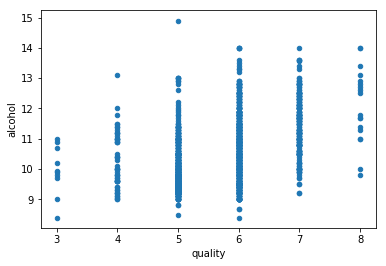

In [18]:
%matplotlib inline
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')